In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import shap

In [2]:
data = pd.read_csv('LTV.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
X = data.drop('Response', axis = 1)
y = data['Response']

In [5]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [6]:
data[num_cols].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


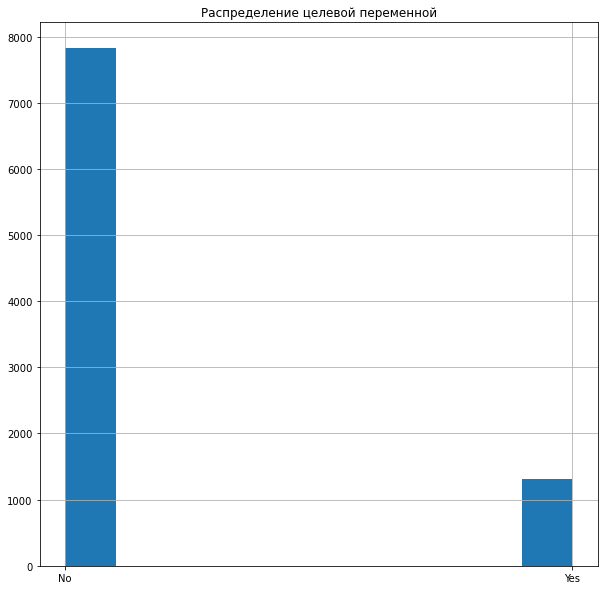

In [7]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
data['Response'].hist()

plt.show()

/Users/dzhibenkov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dzhibenkov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dzhibenkov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

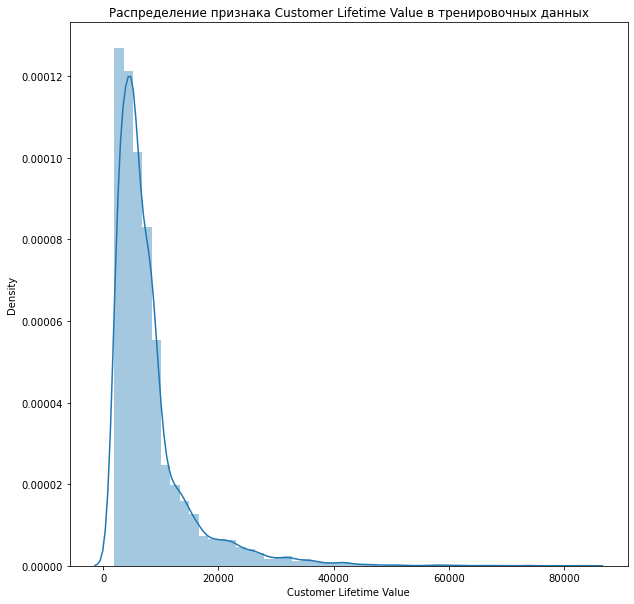

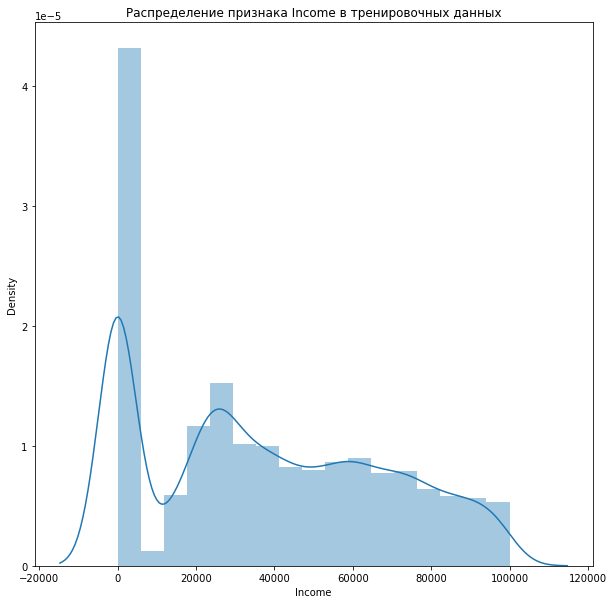

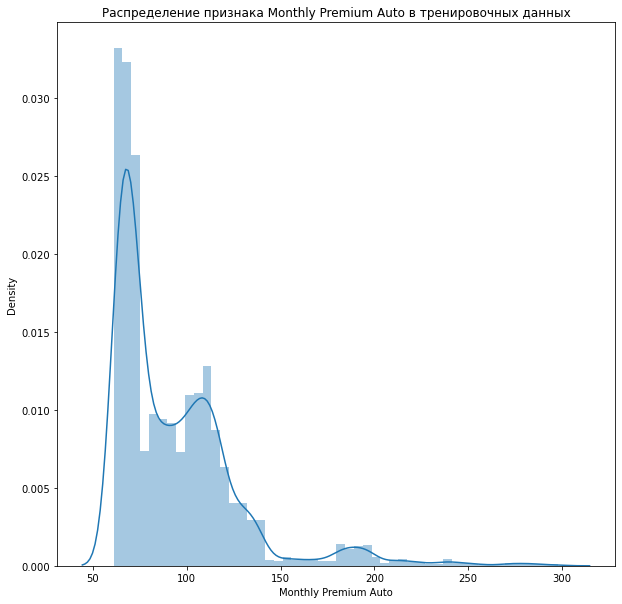

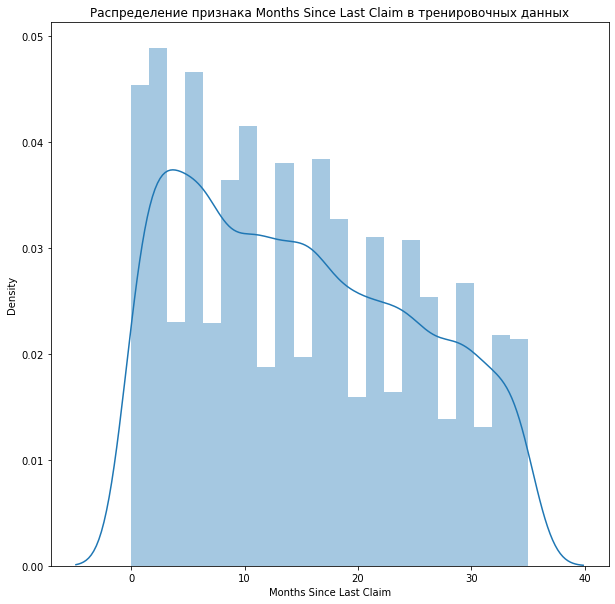

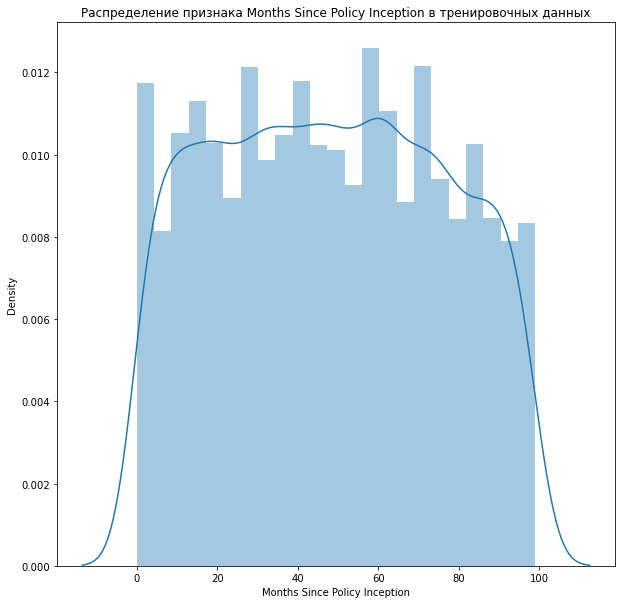

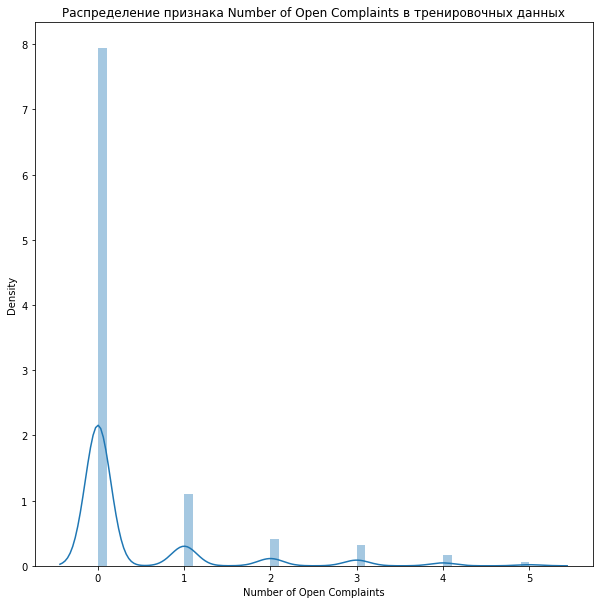

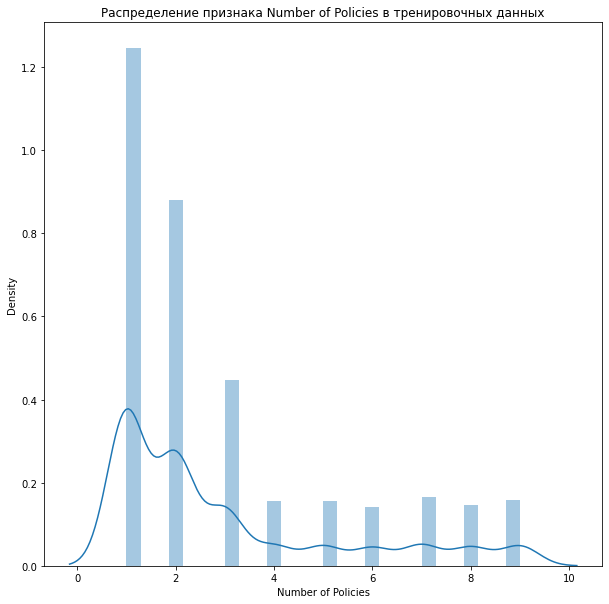

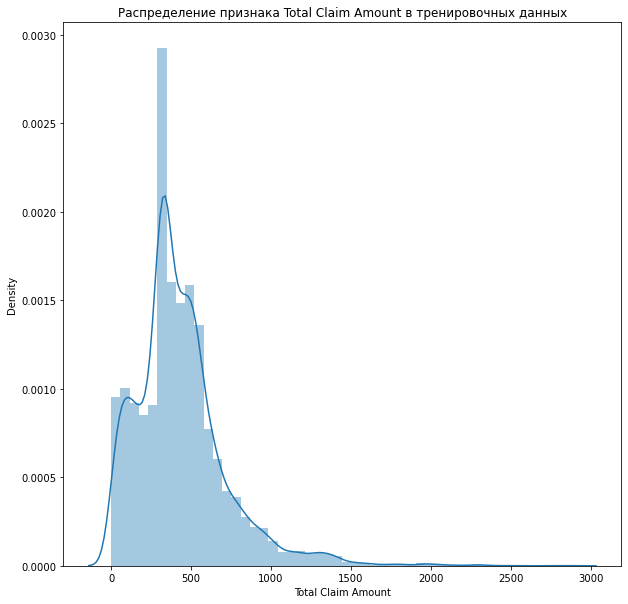

In [8]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(data[col])

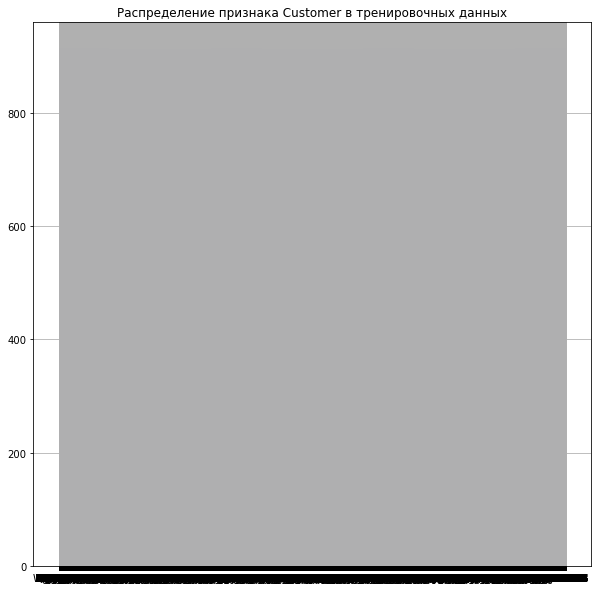

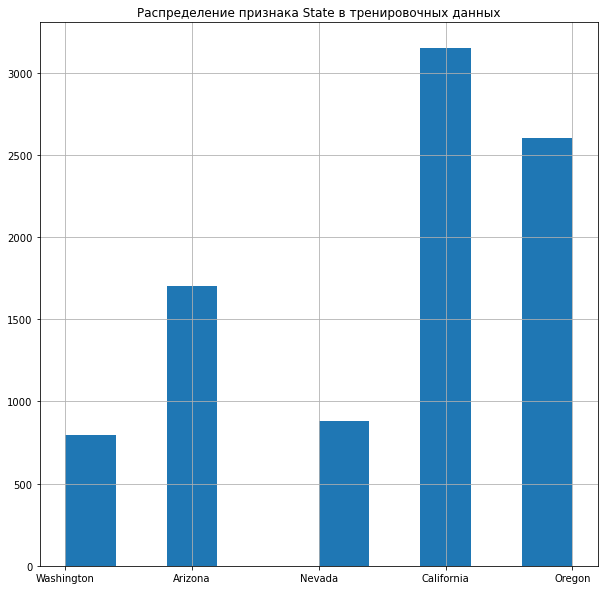

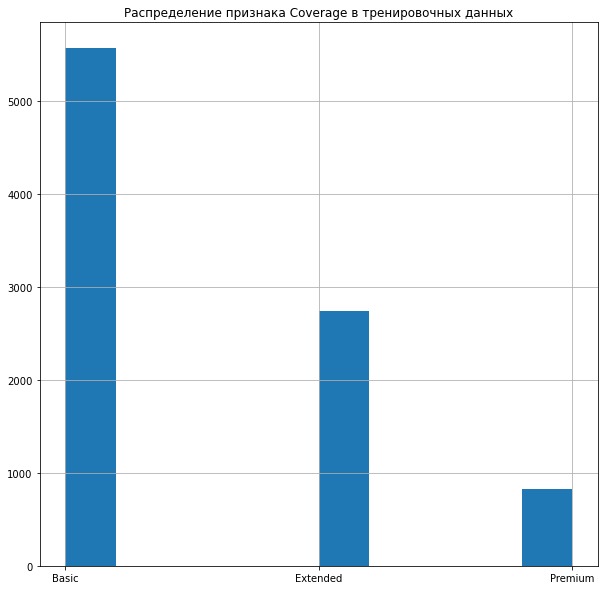

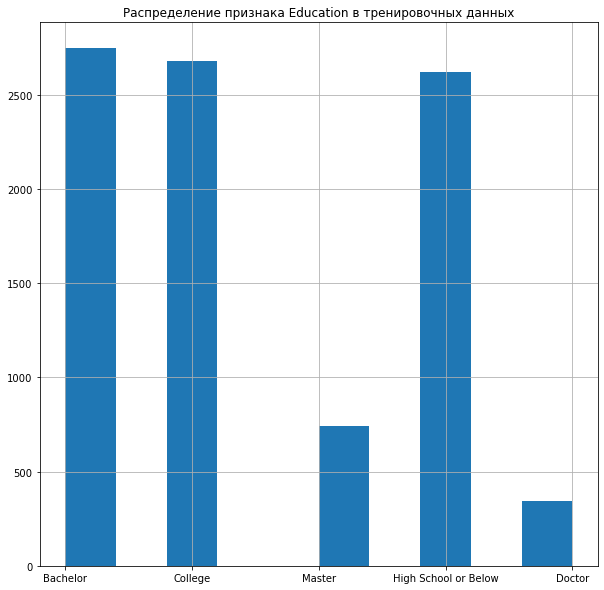

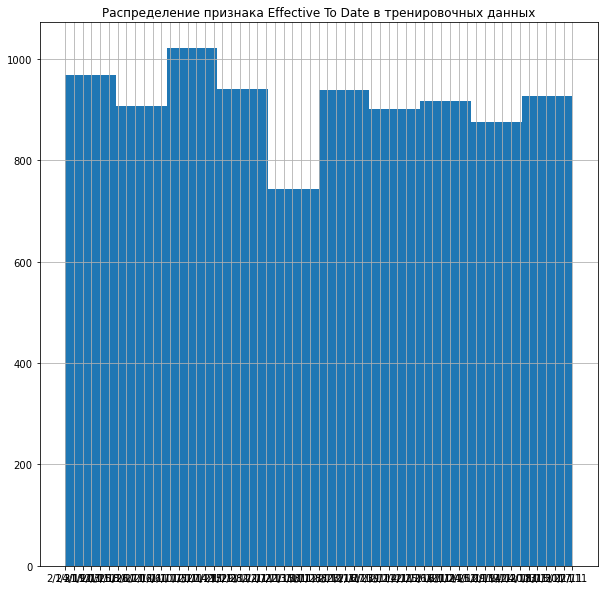

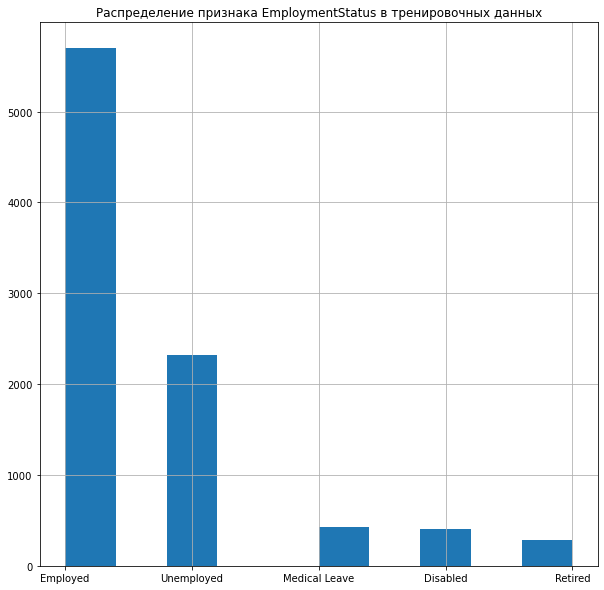

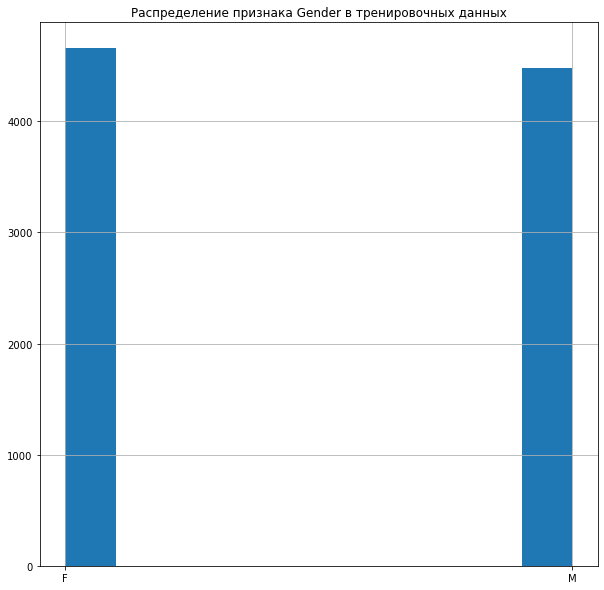

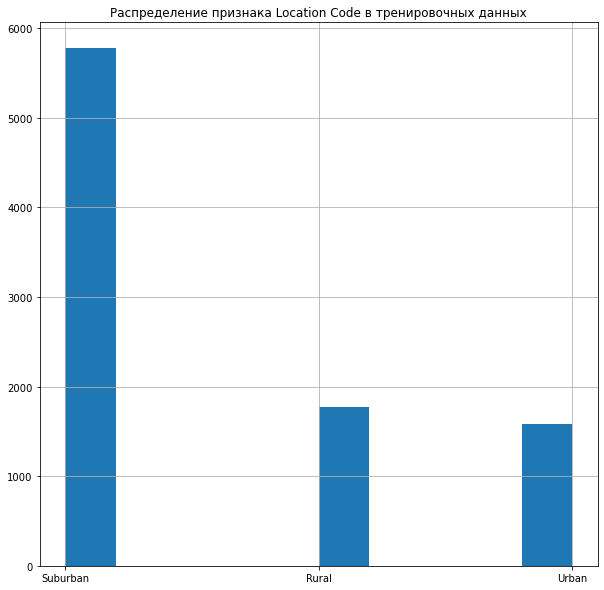

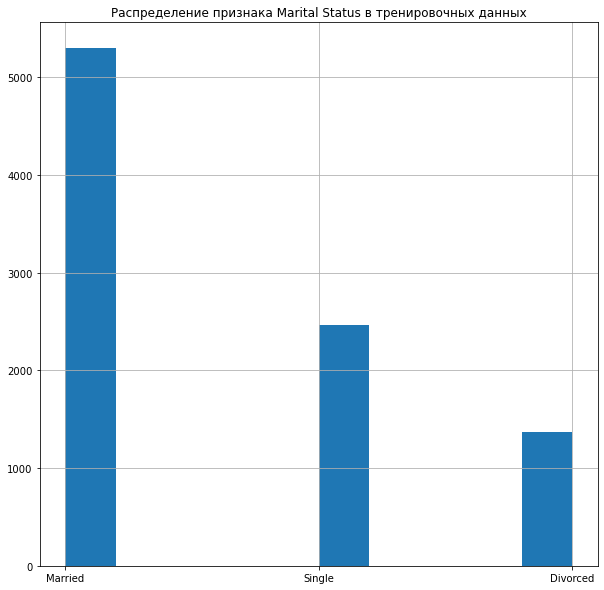

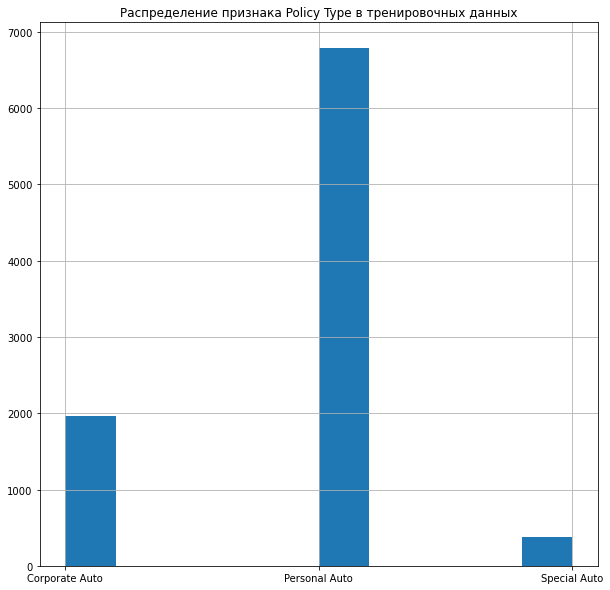

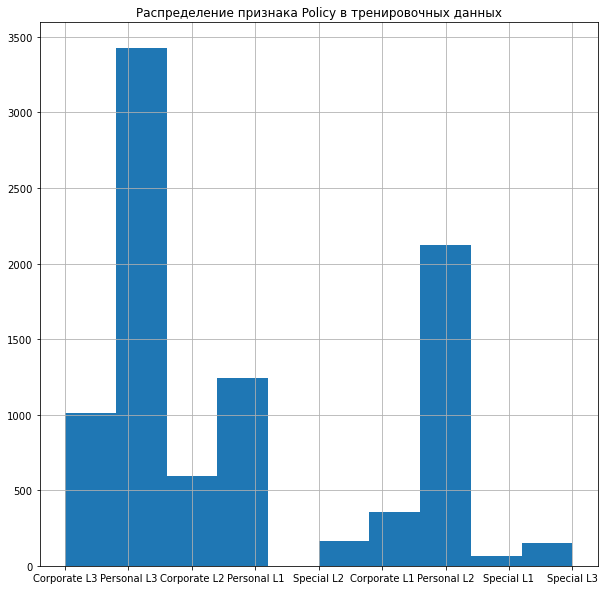

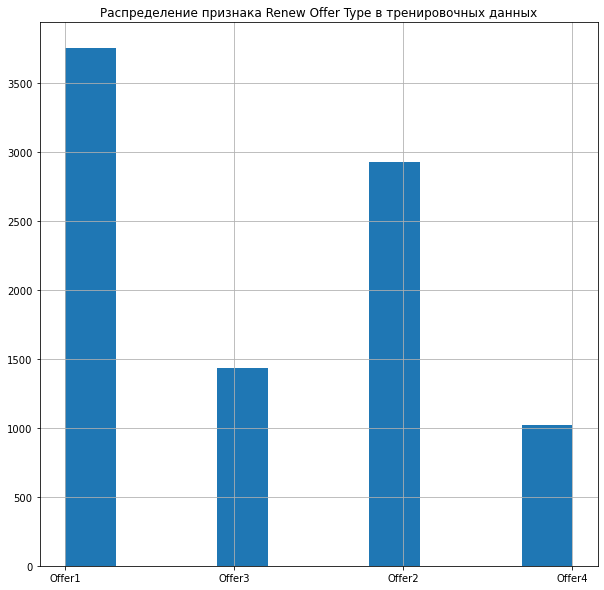

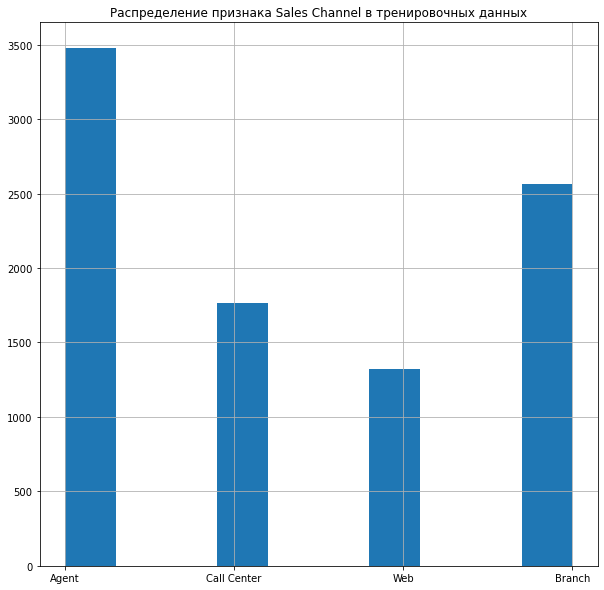

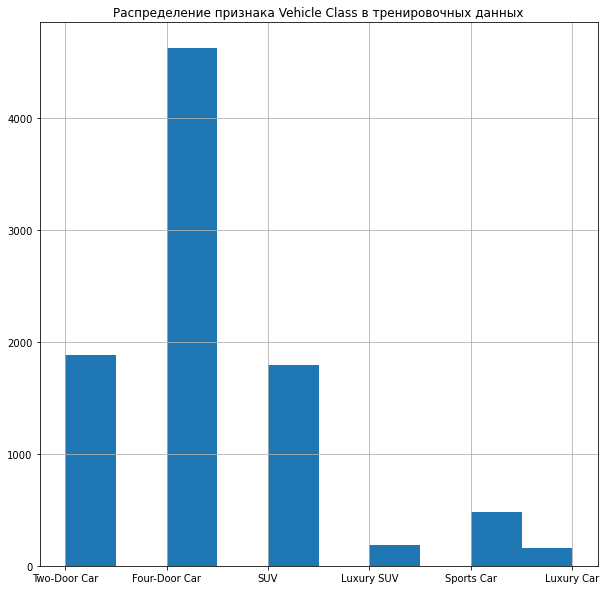

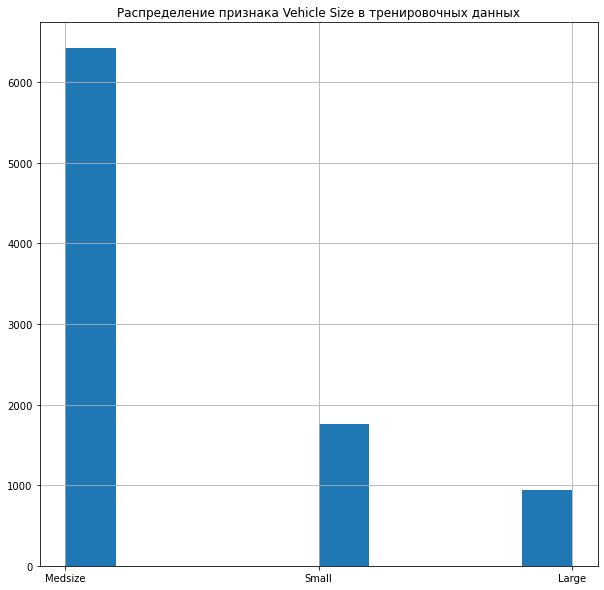

In [9]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    data[col].hist()

### Из диаграмм видно, что решающий результат зависит от числовых признаков Customer Lifetime Value, ### Income, Monthly Premium Auto.
### И не числовых Coverage, EmploymentStatus, Policy Type

In [10]:
le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])
    data[col] = le.transform(data[col])
    y = le.fit_transform(y)
    print(col)

Customer
State
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


In [11]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,2763.519279,No,0,0,47,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,5946,0,6979.535903,No,1,0,24,4,0,0,...,42,0,8,1,5,2,0,1131.464935,0,1
2,96,2,12887.431650,No,2,0,41,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,8016,1,7645.861827,No,0,0,12,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,2488,4,2813.692575,No,0,0,52,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,23405.987980,No,0,0,32,1,1,71941,...,89,0,2,1,3,1,3,198.234764,0,1
9130,5390,1,3096.511217,Yes,1,1,34,1,0,21604,...,28,0,1,0,2,0,1,379.200000,0,1
9131,6688,1,8163.890428,No,1,0,55,4,1,0,...,37,3,2,0,1,0,1,790.784983,0,1
9132,7214,1,7524.442436,No,1,1,52,1,1,21941,...,3,0,3,1,4,2,1,691.200000,0,0


In [12]:
X

,Customer,State,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,2763.519279,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,5946,0,6979.535903,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,1131.464935,0,1
2,96,2,12887.431650,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,8016,1,7645.861827,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,2488,4,2813.692575,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,23405.987980,0,0,32,1,1,71941,2,...,89,0,2,1,3,1,3,198.234764,0,1
9130,5390,1,3096.511217,1,1,34,1,0,21604,1,...,28,0,1,0,2,0,1,379.200000,0,1
9131,6688,1,8163.890428,1,0,55,4,1,0,1,...,37,3,2,0,1,0,1,790.784983,0,1
9132,7214,1,7524.442436,1,1,52,1,1,21941,1,...,3,0,3,1,4,2,1,691.200000,0,0


In [13]:

y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [15]:
log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: 0.6727058466224198


In [16]:
cv_log_reg['test_score']

array([0.67623542, 0.67478477, 0.67952345, 0.67350926, 0.65947633])

In [17]:
dec_tree = DecisionTreeClassifier(random_state = 42) 

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: 0.9714041837701248


In [18]:
cv_dec_tree['test_score']

array([0.9683908 , 0.96716948, 0.97128015, 0.97477746, 0.97540303])

In [19]:
ran_for = RandomForestClassifier(random_state = 42) 

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты случайного леса:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты случайного леса: 0.9999724198725621


In [20]:
cv_ran_for['test_score']

array([0.99997553, 0.9999939 , 0.9999561 , 0.99994391, 0.99999266])

### Лучший результат у случайного леса

In [21]:
log_reg.fit(X_sc, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[ 0.06156731 -0.00878228 -0.08364641 -0.02120601  0.03266696 -0.13868279
  -0.02312583  0.02831971  0.10750612 -0.05075541 -0.2964624  -0.10090983
  -0.05330376 -0.04856115 -0.05049942 -0.09237919  0.04952402 -0.04914446
  -0.58481382 -0.20715948  0.20451311  0.05720456 -0.14779547]]


In [22]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.00716893 0.         0.14014095 0.01229116 0.01653113 0.08146714
 0.0610258  0.0171974  0.1206925  0.00917936 0.02717463 0.07009909
 0.07170655 0.08238457 0.02215384 0.02336974 0.         0.00014968
 0.06806918 0.03172457 0.10128775 0.01482063 0.0213654 ]


In [25]:
X.columns


Index(['Customer', 'State', 'Customer Lifetime Value', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [29]:
shap.initjs()

In [28]:
ran_for.fit(X, y)

RandomForestClassifier(random_state=42)

In [30]:
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

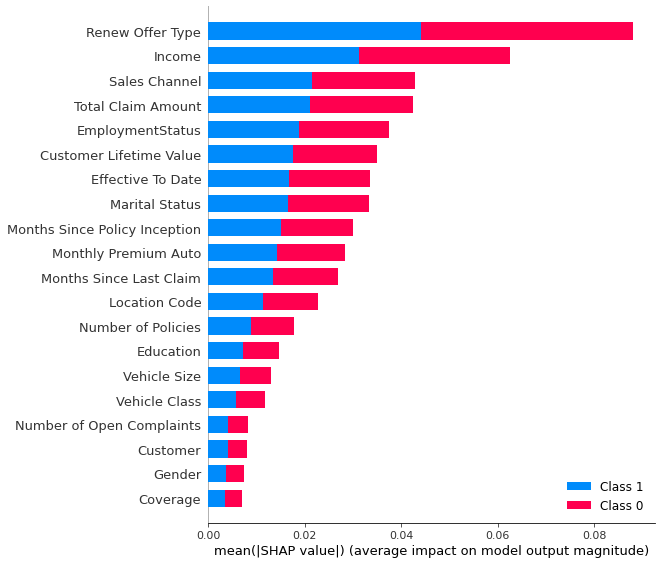

In [31]:
shap.summary_plot(shap_values, X, plot_type="bar")